<a href="https://colab.research.google.com/github/bhaskarrai101/Tiger_Bear_classification/blob/main/Improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing all libraries required
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

(800, 531, 3)

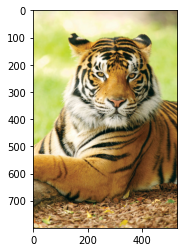

In [2]:
img = image.load_img("/content/drive/Shareddrives/meowl/MeOwl_Data/training/Tiger images/10.Bengal-tiger.jpg") #load image from the folder 
plt.imshow(img)
cv2.imread("/content/drive/Shareddrives/meowl/MeOwl_Data/training/Tiger images/10.Bengal-tiger.jpg").shape

In [3]:
train = ImageDataGenerator(rescale= 1/255) #rescaling the pixel values form 0 to 1 using image data grnerator

In [4]:
train_dataset = train.flow_from_directory("/content/drive/Shareddrives/meowl/MeOwl_Data/training",
                                          target_size=(150,150),
                                          batch_size=3,
                                          class_mode='binary')

Found 751 images belonging to 2 classes.


In [5]:
train_dataset.class_indices

{'Bear images': 0, 'Tiger images': 1}

In [7]:
model501 = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(150,150,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512,activation="relu"),
                             tf.keras.layers.Dense(1,activation="sigmoid")
])

In [8]:
model501.compile(loss="binary_crossentropy",
              optimizer = RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

In [ ]:
history501 = model501.fit(train_dataset,epochs=50,batch_size=20)

In [12]:
model501.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
dir_path = "/content/drive/Shareddrives/meowl/MeOwl_Data/testing"
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'/'+ i,target_size=(150,150))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis=0)
  images = np.vstack([X])
  val = model501.predict(images)
  if val == 0:
    print("Bear")
  else:
    print("Tiger ")

In [19]:
test_dataset = train.flow_from_directory("/content/drive/Shareddrives/meowl/MeOwl_Data/testing11",
                                          target_size=(150,150),
                                          batch_size=3,
                                          class_mode='binary')

Found 156 images belonging to 2 classes.


In [20]:
model501.evaluate(x=test_dataset)

52/52 [==============================] - 49s 949ms/step - loss: 17.8475 - accuracy: 0.7564


[17.84754753112793, 0.7564102411270142]

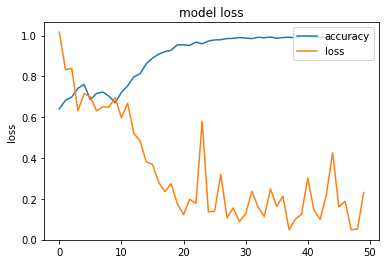

In [26]:
plt.plot(history501.history['accuracy'])
plt.plot(history501.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [27]:
model502 = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(150,150,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(256,activation="relu"),
                             tf.keras.layers.Dense(1,activation="sigmoid")
])

In [ ]:
model502.compile(loss="binary_crossentropy",
              optimizer = RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

In [ ]:
history502 = model502.fit(train_dataset,epochs=35)

In [30]:
model502.evaluate(x=test_dataset)

52/52 [==============================] - 3s 62ms/step - loss: 2.4104 - accuracy: 0.8269


[2.410392999649048, 0.8269230723381042]

In [31]:
model502.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

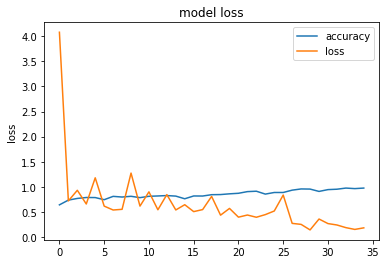

In [32]:
plt.plot(history502.history['accuracy'])
plt.plot(history502.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [33]:
model503 = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(150,150,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation="relu"),
                             tf.keras.layers.Dense(1,activation="sigmoid")
])

In [34]:
model503.compile(loss="binary_crossentropy",
              optimizer = RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

In [35]:
history503 = model503.fit(train_dataset,epochs=35)

Epoch 1/35
 21/251 [=>............................] - ETA: 24s - loss: 158.4331 - accuracy: 0.6349

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


251/251 [==============================] - 23s 88ms/step - loss: 14.2091 - accuracy: 0.6511
Epoch 2/35
251/251 [==============================] - 22s 88ms/step - loss: 1.1621 - accuracy: 0.6458
Epoch 3/35
251/251 [==============================] - 22s 87ms/step - loss: 1.4415 - accuracy: 0.6591
Epoch 4/35
251/251 [==============================] - 22s 86ms/step - loss: 0.6490 - accuracy: 0.6605
Epoch 5/35
251/251 [==============================] - 22s 85ms/step - loss: 0.6988 - accuracy: 0.6551
Epoch 6/35
251/251 [==============================] - 21s 85ms/step - loss: 0.6294 - accuracy: 0.6671
Epoch 7/35
251/251 [==============================] - 21s 84ms/step - loss: 0.5483 - accuracy: 0.7364
Epoch 8/35
251/251 [==============================] - 21s 85ms/step - loss: 0.5289 - accuracy: 0.8096
Epoch 9/35
251/251 [==============================] - 21s 85ms/step - loss: 0.4805 - accuracy: 0.8016
Epoch 10/35
251/251 [==============================] - 21s 85ms/step - loss: 0.4330 - accura

In [36]:
model503.evaluate(x=test_dataset)

52/52 [==============================] - 3s 59ms/step - loss: 18.1283 - accuracy: 0.7115


[18.128280639648438, 0.7115384340286255]

In [37]:
model504 = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(150,150,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation="relu"),
                             tf.keras.layers.Dense(1,activation="sigmoid")
])

In [38]:
model504.compile(loss="binary_crossentropy",
              optimizer = RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

In [39]:
history504 = model504.fit(train_dataset,epochs=27)

Epoch 1/27
133/251 [==============>...............] - ETA: 10s - loss: 11.2035 - accuracy: 0.6196

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


251/251 [==============================] - 22s 86ms/step - loss: 6.2916 - accuracy: 0.6352
Epoch 2/27
251/251 [==============================] - 21s 84ms/step - loss: 0.7194 - accuracy: 0.7004
Epoch 3/27
251/251 [==============================] - 21s 85ms/step - loss: 0.6625 - accuracy: 0.7523
Epoch 4/27
251/251 [==============================] - 21s 84ms/step - loss: 0.6679 - accuracy: 0.7643
Epoch 5/27
251/251 [==============================] - 21s 84ms/step - loss: 0.6498 - accuracy: 0.8109
Epoch 6/27
251/251 [==============================] - 21s 85ms/step - loss: 0.6361 - accuracy: 0.8003
Epoch 7/27
251/251 [==============================] - 21s 85ms/step - loss: 0.7986 - accuracy: 0.8575
Epoch 8/27
251/251 [==============================] - 21s 84ms/step - loss: 0.4274 - accuracy: 0.8389
Epoch 9/27
251/251 [==============================] - 21s 83ms/step - loss: 0.5095 - accuracy: 0.8668
Epoch 10/27
251/251 [==============================] - 21s 83ms/step - loss: 0.4285 - accurac

In [40]:
model504.evaluate(x=test_dataset)

52/52 [==============================] - 3s 56ms/step - loss: 2.9633 - accuracy: 0.7500


[2.963346481323242, 0.75]

In [ ]:
dir_path = "/content/drive/Shareddrives/meowl/MeOwl_Data/testing"
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'/'+ i,target_size=(150,150))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis=0)
  images = np.vstack([X])
  val = model501.predict(images)
  if val == 0:
    print("Bear")
  else:
    print("Tiger ")